In [2]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [3]:
import pandas as pd
df = pd.read_csv('../data/sundown_with_counties.csv')

In [4]:
df['County_no_states'] = df.county.str.split(',').apply(lambda x: x[0])

In [5]:
county_long_names = []
for i in df.county.values:
    x = i.split(',')
    if len(x) == 2:
        county_long_names.append(x[0] + ' ' + x[1])
    else:
        county_long_names.append(x)

In [6]:
df['county_long_names'] = county_long_names

In [7]:
fips_codes = pd.read_csv('../data/county_fips_master.csv', encoding='latin-1')

In [8]:
county2fips = dict(fips_codes[['county_name', 'fips']].values)
# f
county2fips = dict(fips_codes[['long_name', 'fips']].values)
county2fips = {k.lower(): v for k, v in county2fips.items()}

In [9]:
# print(len(df['county_long_names'].unique()))
county_sundown_counts = pd.DataFrame(df.groupby(by = 'county').size())
county_sundown_counts = county_sundown_counts.reset_index()

county_sundown_counts = county_sundown_counts.sort_values(by=['county'])

In [10]:
county_sundown_towns = pd.DataFrame(df.groupby(by = 'county')['city'].transform(lambda x: ', '.join(x)))
county_sundown_towns['county'] = df.county
county_sundown_towns = county_sundown_towns.drop_duplicates()
county_sundown_towns = county_sundown_towns.sort_values(by=['county'])

county_sundown_towns = county_sundown_towns.reset_index()
county_sundown_counts['towns'] = county_sundown_towns['city']

In [11]:
county_sundown_counts = county_sundown_counts.rename(columns = {'County_no_states': 'County', 0: '#'})

In [12]:
county_sundown_counts.county = county_sundown_counts.county.apply(lambda x: x.replace(',', ''))

In [13]:
county_sundown_counts

,county,#,towns
0,Accomack County Va,1,Chincoteague
1,Adair County OK,1,Stilwell
2,Adams County IN,3,"Decatur, Berne, Geneva"
3,Adams County WI,1,Adams
4,Alameda County CA,3,"Berkeley, San Leandro, Piedmont"
5,Albany County NY,3,"Cohoes, Green Island, Voorheesville"
6,Albany County WY,1,Laramie
7,Alexander County IL,4,"McClure, Thebes, Tamms, Cairo"
8,Alfalfa County OK,1,Cherokee
9,Alger County MI,1,Munising


In [14]:
import numpy as np
def county2fips_fct(x):
    if x in county2fips:
        return str(int(county2fips[x]))
    else:
        print('misssed:', x)
        return np.nan

In [15]:
county_sundown_counts

,county,#,towns
0,Accomack County Va,1,Chincoteague
1,Adair County OK,1,Stilwell
2,Adams County IN,3,"Decatur, Berne, Geneva"
3,Adams County WI,1,Adams
4,Alameda County CA,3,"Berkeley, San Leandro, Piedmont"
5,Albany County NY,3,"Cohoes, Green Island, Voorheesville"
6,Albany County WY,1,Laramie
7,Alexander County IL,4,"McClure, Thebes, Tamms, Cairo"
8,Alfalfa County OK,1,Cherokee
9,Alger County MI,1,Munising


In [16]:
county_sundown_counts['fips'] = county_sundown_counts.county.apply(lambda x: county2fips_fct(x.lower())) 

misssed: baxter county
misssed: brown county
misssed: buchanan county
misssed: butler county
misssed: calhoun county
misssed: calvert county
misssed: clay county
misssed: cleburne county
misssed: clinton county
misssed: coffey county
misssed: colfax county
misssed: colonial heights county va
misssed: crawford county
misssed: cullman county
misssed: del norte county
misssed: deuel county
misssed: douglas county
misssed: dupage county
misssed: falls church county va
misssed: forsyth county
misssed: gage county
misssed: garrett county
misssed: graham county
misssed: grant county la
misssed: greer county
misssed: hamilton county
misssed: haskell county
misssed: howard county
misssed: humboldt county
misssed: jasper county
misssed: jefferson county la
misssed: johnson county
misssed: kane county
misssed: lafourche county la
misssed: lincoln county
misssed: logan county
misssed: marshall county
misssed: menominee county
misssed: monroe county
misssed: montague county
misssed: newton county
m

In [17]:
county_sundown_counts = county_sundown_counts[county_sundown_counts.fips.notnull()]

In [18]:
county_sundown_counts[county_sundown_counts.fips.isnull()]

,county,#,towns,fips


In [19]:
county_sundown_counts

,county,#,towns,fips
0,Accomack County Va,1,Chincoteague,51001
1,Adair County OK,1,Stilwell,40001
2,Adams County IN,3,"Decatur, Berne, Geneva",18001
3,Adams County WI,1,Adams,55001
4,Alameda County CA,3,"Berkeley, San Leandro, Piedmont",6001
5,Albany County NY,3,"Cohoes, Green Island, Voorheesville",36001
6,Albany County WY,1,Laramie,56001
7,Alexander County IL,4,"McClure, Thebes, Tamms, Cairo",17003
8,Alfalfa County OK,1,Cherokee,40003
9,Alger County MI,1,Munising,26003


In [20]:
# prepend 0 to fips
county_sundown_counts['fips'] = county_sundown_counts['fips'].apply(lambda x: str(x) if len(str(x)) == 5 else '0' + str(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth_mapbox(county_sundown_counts, geojson=counties, locations='fips', color='#',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'#':'# of Sundown Towns', 'towns': 'sundown towns'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
county_sundown_counts

In [ ]:
import json, urllib
with urllib.request.urlopen("https://geo.fcc.gov/api/census/area?lat=42.3295&lon=-71.0826&format=json") as url:
    data = json.loads(url.read().decode())
    print(data)

print(json.dumps(data, indent=4, sort_keys=True))

print(data['results'][0]['state_fips'])
print(data['results'][0]['county_fips'])
print(data['results'][0]['county_name'])

In [ ]:
counties_with_latlong = pd.read_csv('../data/counties.txt', dtype={"GEOID": str}, sep='\t')

In [ ]:
county_sundown_counts

In [ ]:
matching_county = counties_with_latlong.loc[counties_with_latlong["GEOID"] == '51001']

In [ ]:
lat, long = matching_county[matching_county.columns[-2:]].values.tolist()[0]

In [22]:
county_sundown_counts

,county,#,towns,fips
0,Accomack County Va,1,Chincoteague,51001
1,Adair County OK,1,Stilwell,40001
2,Adams County IN,3,"Decatur, Berne, Geneva",18001
3,Adams County WI,1,Adams,55001
4,Alameda County CA,3,"Berkeley, San Leandro, Piedmont",06001
5,Albany County NY,3,"Cohoes, Green Island, Voorheesville",36001
6,Albany County WY,1,Laramie,56001
7,Alexander County IL,4,"McClure, Thebes, Tamms, Cairo",17003
8,Alfalfa County OK,1,Cherokee,40003
9,Alger County MI,1,Munising,26003


In [23]:
#############################################
#############################################
######## BELOW IS CENSUS ANALYSIS ###############
######## BELOW IS CENSUS ANALYSIS ###############
#############################################
#############################################

from urllib.request import urlopen
import json
import os

import numpy as np
import pandas as pd

import csv
# import plotly.express as px
# import plotly.graph_objects as go  # or plotly.express as px

# from .about_us import about_us_html

In [24]:
census_data = pd.read_csv('../data/2019-census-all.csv', sep = ',')

In [25]:
census_data['STATE_STR'] = census_data.STATE.apply(lambda x: '0'*(2 - len(str(x))) + str(x))
census_data['COUNTY_STR'] = census_data.COUNTY.apply(lambda x: '0'*(3 - len(str(x))) + str(x))
census_data['fips'] = census_data.STATE_STR + census_data.COUNTY_STR

In [26]:
white_cols = ['WA_MALE', 'WA_FEMALE']
minority_cols = ['BA_MALE', 'BA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'IA_MALE', 'IA_FEMALE']
columns_of_interest = white_cols + minority_cols

In [27]:
census_data['white_pop'] = np.sum(census_data[white_cols], axis=1)
census_data['minority_pop'] = np.sum(census_data[minority_cols], axis=1)
census_data['total_pop'] = np.sum(census_data[['white_pop', 'minority_pop']], axis=1)
census_data['perc_white'] = census_data['white_pop'] / census_data['total_pop']
census_data['perc_minority'] = census_data['minority_pop'] / census_data['total_pop']

In [28]:
census_data['is_sundown_county'] = census_data.fips.apply(lambda x: str(x) in county_sundown_counts['fips'].tolist())

In [36]:
pop_cols = ['white_pop', 'minority_pop']
descriptive_sundown = census_data[census_data['is_sundown_county']]['perc_white'].describe()
descriptive_non_sundown = census_data[census_data['is_sundown_county'] == False]['perc_white'].describe()

In [37]:
import matplotlib

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11698c810>,
      dtype=object)

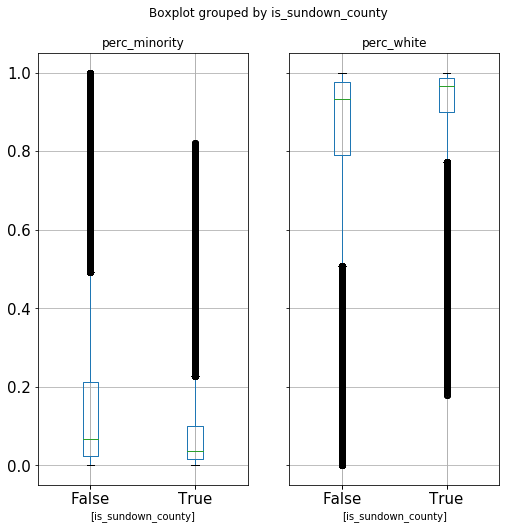

In [38]:
census_data[['perc_white', 'perc_minority', 'is_sundown_county']].boxplot(
    by=['is_sundown_county'],
    fontsize=15,
    figsize=(8, 8)
)

In [43]:
census_data[census_data['is_sundown_county'] == False]['perc_white'].median()

0.9332191780821918

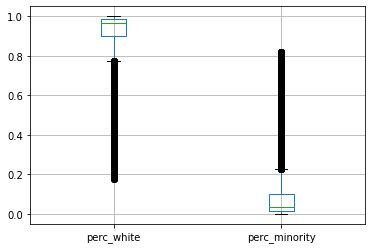

In [40]:
census_data[census_data['is_sundown_county'] == True][['perc_white', 'perc_minority']].boxplot()

In [41]:
descriptive_non_sundown

count    495827.000000
mean          0.851177
std           0.183034
min           0.000000
25%           0.788852
50%           0.933219
75%           0.976000
max           1.000000
Name: perc_white, dtype: float64

In [42]:
descriptive_sundown

count    220476.000000
mean          0.922831
std           0.099600
min           0.178540
25%           0.899771
50%           0.964824
75%           0.984804
max           1.000000
Name: perc_white, dtype: float64

In [1]:
#### Pulling from EDA.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_mortality = pd.read_csv('../data/wonder_mortality.txt', sep = '\t')

In [3]:
df_mortality[df_mortality.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_total_mortality.csv')
df_mortality[df_mortality.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_total_mortality.csv')
df_mortality_infant = pd.read_csv('../data/mortality_infant.txt', sep = '\t')
df_mortality_infant[df_mortality_infant.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_infant_mortality.csv')
df_mortality_infant[df_mortality_infant.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_infant_mortality.csv')

In [37]:
df_black_total_mortality = pd.read_csv('../data/black_total_mortality.csv', index_col = 0)
df_white_total_mortality = pd.read_csv('../data/white_total_mortality.csv', index_col = 0)
df_black_infant_mortality = pd.read_csv('../data/black_infant_mortality.csv', index_col = 0)
df_white_infant_mortality = pd.read_csv('../data/white_infant_mortality.csv', index_col = 0)

In [38]:
df_infant_stat_counties_white_no_black = np.setdiff1d(df_white_infant_mortality.County.unique(), df_black_infant_mortality.County.unique()) 

In [39]:
df_infant_stat_counties_black_no_white = np.setdiff1d(df_black_infant_mortality.County.unique(), df_white_infant_mortality.County.unique()) 

In [40]:
df_black_total_mortality = df_black_total_mortality[df_black_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_total_mortality = df_white_total_mortality[df_white_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_infant_mortality = df_white_infant_mortality[df_white_infant_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)

In [41]:
for i in ['black', 'white']:
    for j in ['infant', 'total']:
        exec("df_" + i + "_" + j +"_mortality['Death_Population_Ratio'] = df_" + i + "_" + j +"_mortality['Deaths']/ df_" + i + "_" + j +"_mortality['Population']")
        


In [42]:
df_black_total_mortality["Race"] = 'Black'
df_black_infant_mortality["Race"] = 'Black'
df_white_total_mortality["Race"] = 'White'
df_white_infant_mortality["Race"] = 'White'

In [43]:
df_total_mortality = pd.concat([df_black_total_mortality, df_white_total_mortality])
df_infant_mortality = pd.concat([df_black_infant_mortality, df_white_infant_mortality])

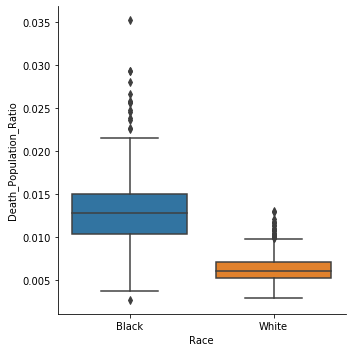

In [44]:
sns.catplot(data=df_infant_mortality, kind="box", x="Race", y="Death_Population_Ratio")

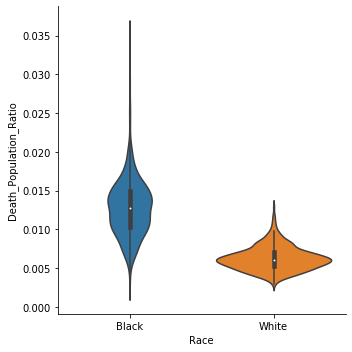

In [45]:
sns.catplot(data=df_infant_mortality, kind="violin", x="Race", y="Death_Population_Ratio")

In [46]:
## Sundown town data loading

In [48]:
df_sundown = pd.read_csv('../data/sundown_with_counties.csv')
df_sundown['County_with_states'] = [i + ', ' + df_sundown.state.values[idx] for idx, i in enumerate(df_sundown.county.values)]
df_sundown['County_with_states'].drop_duplicates()
df_sundown.state = df_sundown.state.str.upper()
sundown_state_stat = df_sundown.state.value_counts()
df_sundown_state_stats = pd.DataFrame(sundown_state_stat).reset_index()
df_sundown_state_stats = df_sundown_state_stats.rename(columns = {"index": "State", "state":"# of Sundown Town"})

Text(0.5, 1.0, '# of Sundown Towns in Different State')

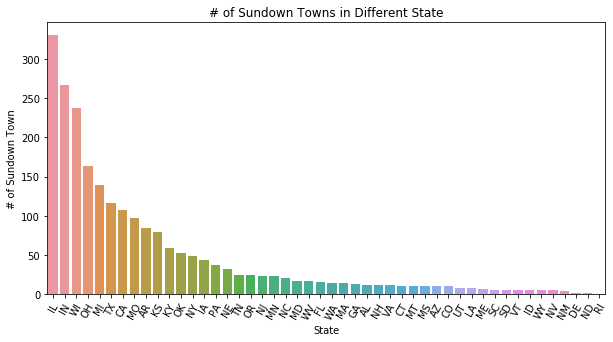

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
chart = sns.barplot(data = df_sundown_state_stats, x = 'State', y = '# of Sundown Town')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('# of Sundown Towns in Different State')

In [53]:
df_sundown_state_stats = df_sundown_state_stats.sort_values(by = '# of Sundown Town', ascending = False)
df_sundown_state_stats

,State,# of Sundown Town
0,IL,330
1,IN,267
2,WI,237
3,OH,163
4,MI,139
5,TX,117
6,CA,107
7,MO,97
8,AR,85
9,KS,80


In [65]:
df_black_infant_mortality['fips_str'] = df_black_infant_mortality['County Code'].apply(lambda x: str(x).split('.')[0])
df_black_infant_mortality['fips'] = df_black_infant_mortality['fips_str'].apply(lambda x: str(x) if len(str(x)) == 5 else '0' + str(x))

In [69]:
county_sundown_counts

,county,#,towns,fips
0,Accomack County Va,1,Chincoteague,51001
1,Adair County OK,1,Stilwell,40001
2,Adams County IN,3,"Decatur, Berne, Geneva",18001
3,Adams County WI,1,Adams,55001
4,Alameda County CA,3,"Berkeley, San Leandro, Piedmont",06001
5,Albany County NY,3,"Cohoes, Green Island, Voorheesville",36001
6,Albany County WY,1,Laramie,56001
7,Alexander County IL,4,"McClure, Thebes, Tamms, Cairo",17003
8,Alfalfa County OK,1,Cherokee,40003
9,Alger County MI,1,Munising,26003


In [79]:
mortality_with_sundown = pd.merge(df_black_infant_mortality, county_sundown_counts, how='left', on='fips')
mortality_with_sundown['#'] = mortality_with_sundown['#'].fillna(0)
mortality_with_sundown_and_census = pd.merge(mortality_with_sundown, census_data, how='left', on='fips')

In [80]:
mortality_with_sundown_and_census

,County,County Code,Deaths,Population,Death_Population_Ratio,Race,fips,fips_str,county,#,...,HNAC_MALE,HNAC_FEMALE,STATE_STR,COUNTY_STR,white_pop,minority_pop,total_pop,perc_white,perc_minority,is_sundown_county
0,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,19,10,01,001,43297,10478,53775,0.805151,0.194849,False
1,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,2,1,01,001,2727,716,3443,0.792042,0.207958,False
2,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,2,0,01,001,3047,837,3884,0.784501,0.215499,False
3,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,1,1,01,001,3278,910,4188,0.782713,0.217287,False
4,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,3,1,01,001,3213,990,4203,0.764454,0.235546,False
5,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,1,1,01,001,2385,640,3025,0.788430,0.211570,False
6,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,5,2,01,001,2457,670,3127,0.785737,0.214263,False
7,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,2,1,01,001,2587,706,3293,0.785606,0.214394,False
8,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,1,2,01,001,3241,855,4096,0.791260,0.208740,False
9,"Autauga County, AL",1001.0,32.0,2181.0,0.014672,Black,01001,1001,NaN,0.0,...,1,1,01,001,3283,765,4048,0.811018,0.188982,False


In [127]:
import statsmodels.api as sm
y = mortality_with_sundown_and_census['Death_Population_Ratio']
logit_covariates = ['perc_minority', '#', 'is_sundown_county']
X = mortality_with_sundown_and_census[logit_covariates]
X = X.convert_objects(convert_numeric=True)
y = y.convert_objects(convert_numeric=True)

In [128]:
logit_model = sm.Logit(y.astype(float), X.astype(float))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.049477
         Iterations 9


In [129]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:              Logit                  Pseudo R-squared: inf       
Dependent Variable: Death_Population_Ratio AIC:              23469.7737
Date:               2020-10-28 22:28       BIC:              23500.9027
No. Observations:   237120                 Log-Likelihood:   -11732.   
Df Model:           2                      LL-Null:          0.0000    
Df Residuals:       237117                 LLR p-value:      1.0000    
Converged:          1.0000                 Scale:            1.0000    
No. Iterations:     9.0000                                             
-----------------------------------------------------------------------
                    Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
perc_minority      -20.1039   0.1134 -177.3362 0.0000 -20.3261 -19.8817
#                    0.0567   0.0114    4.9563 0.0000   0.0343   0.0792
is_sundown_county   -2.6154   0.0491  -53.3022 0.0000  -2.7116  -2.5192
=======================================================================

"""

In [150]:
### pulling poverty and income in
df_poverty = pd.read_csv('../data/2018-poverty.csv', skiprows=[1], dtype={'County ID': str})
df_poverty = df_poverty.rename(columns={'County ID': 'fips'})

In [152]:
df_poverty = df_poverty[['fips', 'All Ages in Poverty Percent', 'Median Household Income in Dollars']]

In [154]:
mortality_with_sundown_census_poverty = pd.merge(mortality_with_sundown_and_census, df_poverty, how='left', on='fips')

In [156]:
mortality_with_sundown_census_poverty.reset_index(drop = True).to_csv('../data/mortality_with_sundown_census_poverty.csv')

In [ ]:
y = mortality_with_sundown_and_census['Death_Population_Ratio']
logit_covariates = ['perc_minority', '#', 'is_sundown_county']
X = mortality_with_sundown_and_census[logit_covariates]
X = X.convert_objects(convert_numeric=True)
y = y.convert_objects(convert_numeric=True)